<a href="https://colab.research.google.com/github/yngdln/math-statistics/blob/main/%D0%9B%D0%B0%D0%B13_%D0%9C%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import scipy.special as sc
import mpmath
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k=100
n=2.5
data = np.random.rand(k)
data

array([0.32634737, 0.82343227, 0.29562034, 0.30881489, 0.10699496,
       0.08152774, 0.19067877, 0.50874149, 0.24116403, 0.41296726,
       0.40585629, 0.65963616, 0.67585524, 0.60087139, 0.65515338,
       0.92205992, 0.92045858, 0.65959   , 0.68523747, 0.16564001,
       0.21577561, 0.57685711, 0.48804786, 0.91647267, 0.02085063,
       0.73615773, 0.40287538, 0.17671088, 0.53693481, 0.75022799,
       0.39262102, 0.85711519, 0.3484556 , 0.07877774, 0.47182652,
       0.69946748, 0.0477746 , 0.00587693, 0.19698245, 0.650405  ,
       0.88521446, 0.32343414, 0.70170085, 0.09881682, 0.65727398,
       0.79428169, 0.06809955, 0.76445511, 0.37220218, 0.58197076,
       0.26401488, 0.36355268, 0.58471149, 0.7813651 , 0.99206485,
       0.90829473, 0.89946594, 0.19247886, 0.04149452, 0.99510796,
       0.08186046, 0.94879842, 0.5684234 , 0.79648931, 0.41167125,
       0.63078275, 0.2209591 , 0.17454331, 0.20573049, 0.32820119,
       0.88359363, 0.07397637, 0.01123176, 0.69419921, 0.78000

In [ ]:
def F_x(x):
  return(float(math.gamma(n/2)-mpmath.gammainc(n/2,x/2))/math.gamma(n/2))
def F_inv(n,y):
  return(2*sc.gammaincinv(n/2, y*math.gamma(n/2)))

In [ ]:
X=F_inv(n,data)
X


array([1.04292756, 3.41793542, 0.94408843, 0.9862351 , 0.37075685,
       0.29331863, 0.62112557, 1.69683413, 0.77419497, 1.33682563,
       1.311711  , 2.37947279, 2.46475281, 2.09235784, 2.35640134,
       4.37379936, 4.35460769, 2.37923411, 2.51543943, 0.54616784,
       0.69680606, 1.98356009, 1.6152511 , 4.30753369, 0.09432816,
       2.81022581, 1.30124091, 0.57926168, 1.81191195, 2.89835895,
       1.26547819, 3.70190064, 1.1156346 , 0.28485056, 1.55287092,
       2.59433729, 0.18687413, 0.03379479, 0.64007179, 2.33218948,
       3.96876085, 1.03345046, 2.60695094, 0.34604881, 2.36728926,
       3.19723963, 0.25169139, 2.99086749, 1.19539104, 2.00635702,
       0.84475973, 1.1661306 , 2.01865608, 3.10566898, 5.43095703,
       4.21391167, 4.11699432, 0.62653215, 0.16619283, 5.49062147,
       0.29434143, 4.72108228, 1.9463813 , 3.21324994, 1.33223368,
       2.23450184, 0.71253047, 0.5727772 , 0.66643081, 1.04897044,
       3.95249544, 0.26999934, 0.05703265, 2.56483481, 3.09625

In [ ]:
print(min(X))
print(max(X))
print(max(X) - min(X))

0.0337947937032393
5.490621473305929
5.456826679602689


In [ ]:
n_bins = int(1 + np.log(len(X))/np.log(2))
n_bins
inter=(max(X) - min(X))/n_bins
intervals= np.random.rand(n_bins+1)
intervals[0]=min(X)
for i in range (n_bins):
  intervals[i+1]=intervals[i]+inter
intervals

array([0.03379479, 0.81334146, 1.59288813, 2.3724348 , 3.15198147,
       3.93152814, 4.7110748 , 5.49062147])

(array([29., 21., 15., 15.,  7.,  8.,  5.]),
 array([0.03379479, 0.81334146, 1.59288813, 2.3724348 , 3.15198147,
        3.93152814, 4.7110748 , 5.49062147]),
 <BarContainer object of 7 artists>)

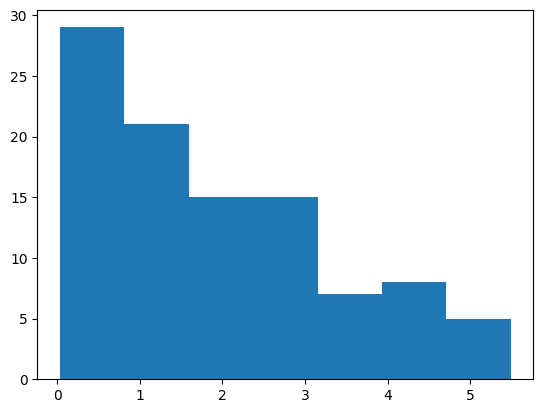

In [ ]:
plt.hist(X, bins = n_bins)

In [ ]:
counts=np.zeros(n_bins+1)
for i in range (n_bins):
  for j in range(k):
    if(intervals[i]<=X[j]<=intervals[i+1]):
      counts[i]= counts[i]+1
counts[0]= counts[0]+1
counts

array([30., 21., 15., 15.,  7.,  8.,  5.,  0.])

In [ ]:
properties = counts / len(X)
properties

array([0.3 , 0.21, 0.15, 0.15, 0.07, 0.08, 0.05, 0.  ])

In [ ]:
def p(x):
  if(x>=min(X)):
    return((x**(n/2-1))/(2**(n/2)*math.gamma(n/2))*math.exp(-x/2))
  else:
    return 0

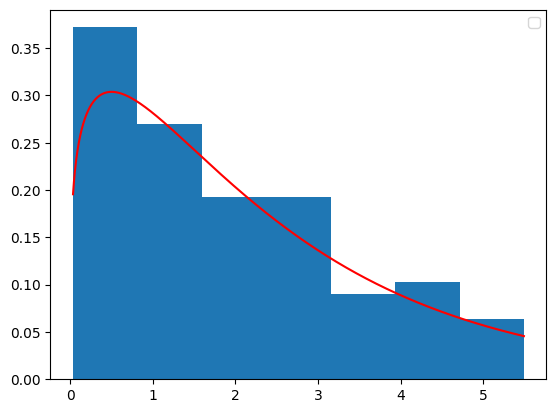

In [ ]:
x_new = np.linspace(min(X), max(X), 1000)
y_new = list(map(p, x_new))
plt.plot(x_new, y_new, "r")
plt.hist(X, bins = n_bins, density = True)
plt.legend()
plt.show()

In [ ]:
m_teor=n
m_teor

2.5

In [ ]:
d_teor=2*n
d_teor

5.0

In [ ]:
m_emp=np.mean(X)
m_emp

1.8973394281642157

In [ ]:
(1/(k-1)) * (np.sum((X - np.mean(X))**2))

2.0903826297185852

In [ ]:
gamma = 0.1

eps = np.sqrt((-1/(2 * k)) * np.log(gamma / 2))
eps
def teorF(x):
  if x >= min(X):
    return (float(math.gamma(n/2)-mpmath.gammainc(n/2,x/2)/math.gamma(n/2)))
  else:
    return 0

def emperF(x):
  def ind(k):
    if k > 0:
      return 1
    else:
      return 0
  sum = 0
  for i in range(len(X)):
    sum += ind(x - X[i]) / len(X)
  return sum
def remperF(x):
  if emperF(x) + eps < 1:
    return emperF(x) + eps
  else:
    return 1

def lemperF(x):
  if emperF(x) - eps > 0:
    return emperF(x) - eps
  else:
    return 0

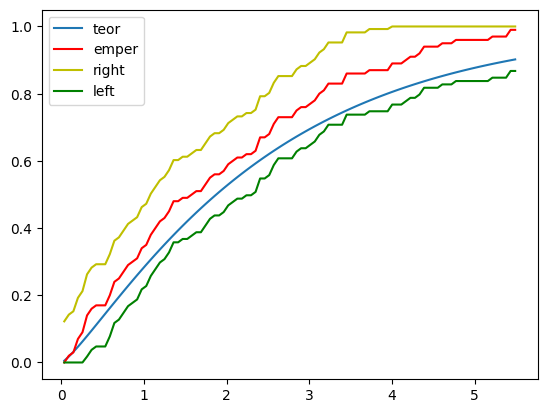

In [ ]:
x_new = np.linspace(min(X), max(X), 100)
plt.plot(x_new, list(map(F_x, x_new)))
plt.plot(x_new, list(map(emperF, x_new)), 'r')
plt.plot(x_new, list(map(remperF, x_new)), 'y')
plt.plot(x_new, list(map(lemperF, x_new)), 'g')
plt.legend(['teor', 'emper', 'right', 'left'])
plt.show()

In [ ]:
F_x(12)

0.995559294868786